In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

## Job Openings

We see that the Total Job Openings and Professional & Business Services Openings follow a very similar trend, and we don't see any major differences between the two trajectories.

In [2]:
total = pd.read_csv("processed/job_openings_total.csv", header=0, parse_dates=["date"])
prof = pd.read_csv("processed/job_openings_prof.csv", header=0, parse_dates=["date"])

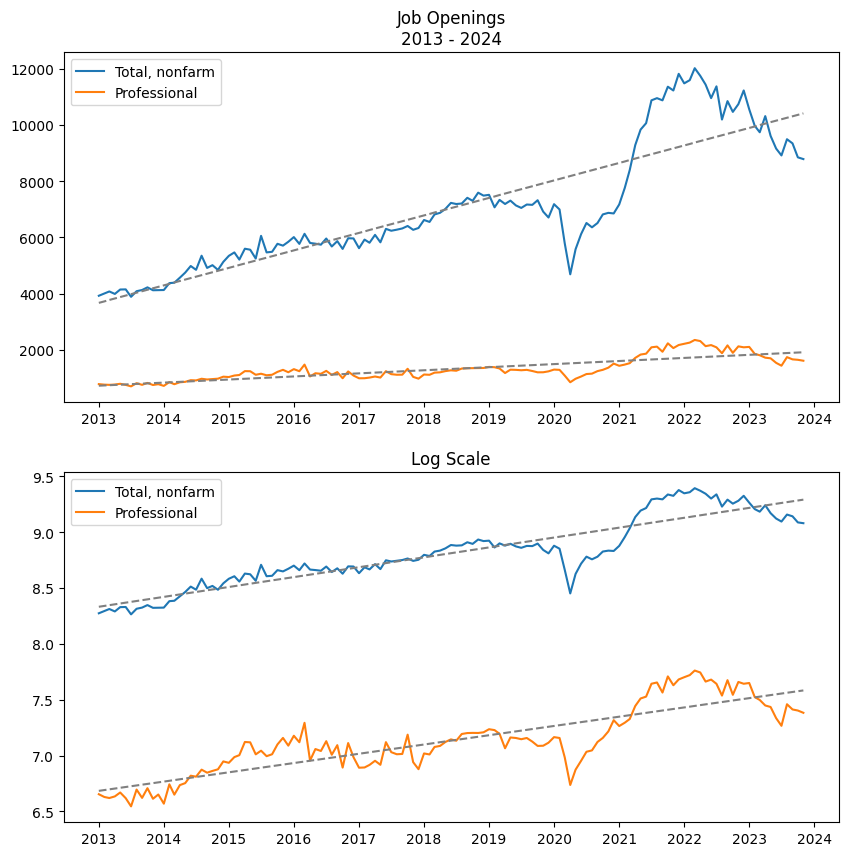

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))

# Plot 1
axs[0].plot(total["date"], total["value"], label="Total, nonfarm")
axs[0].plot(prof["date"], prof["value"], label="Professional")

# Trend Lines
total_A = np.vstack([total.index, np.ones(len(total.index))]).T
total_m, total_c = np.linalg.lstsq(total_A, total["value"], rcond=None)[0]
prof_A = np.vstack([prof.index, np.ones(len(prof.index))]).T
prof_m, prof_c = np.linalg.lstsq(prof_A, prof["value"], rcond=None)[0]

axs[0].plot(total["date"], total_m * total.index + total_c, color="grey", linestyle="--")
axs[0].plot(prof["date"], prof_m * prof.index + prof_c, color="grey", linestyle="--")

axs[0].xaxis.set_major_locator(mdates.YearLocator(base=1))
axs[0].legend()
axs[0].set_title("Job Openings\n2013 - 2024") 


# Plot 2
axs[1].plot(total["date"], np.log(total["value"]), label="Total, nonfarm")
axs[1].plot(prof["date"], np.log(prof["value"]), label="Professional")
axs[1].xaxis.set_major_locator(mdates.YearLocator(base=1))

# Trend Lines
total_log_A = np.vstack([total.index, np.ones(len(total.index))]).T
total_log_m, total_log_c = np.linalg.lstsq(total_log_A, np.log(total["value"]), rcond=None)[0]
prof_log_A = np.vstack([prof.index, np.ones(len(prof.index))]).T
prof_log_m, prof_log_c = np.linalg.lstsq(prof_log_A, np.log(prof["value"]), rcond=None)[0]

axs[1].plot(total["date"], total_log_m * total.index + total_log_c, color="grey", linestyle="--")
axs[1].plot(prof["date"], prof_log_m * prof.index + prof_log_c, color="grey", linestyle="--")
axs[1].legend()
axs[1].set_title("Log Scale") 





plt.show()

## Establishment Job Gains, Losses

The number of establishments in Professional & Business Services with job losses is higher than the number of establishments with losses, but that is not inconsistent with the "normalcy". The period of 2021 & 2022 would be considered abnormal compared with previous years.

In [4]:
total_gains = pd.read_csv("processed/gains_total.csv", parse_dates=["date"])
prof_gains = pd.read_csv("processed/gains_prof.csv", parse_dates=["date"])
total_loss = pd.read_csv("processed/loss_total.csv", parse_dates=["date"])
prof_loss = pd.read_csv("processed/loss_prof.csv", parse_dates=["date"])

/var/folders/w3/z7twm9nj18n3x5s3vcy3yt500000gn/T/ipykernel_12806/391388540.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(minor=True, labels=labels,
/var/folders/w3/z7twm9nj18n3x5s3vcy3yt500000gn/T/ipykernel_12806/391388540.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(minor=True, labels=labels,


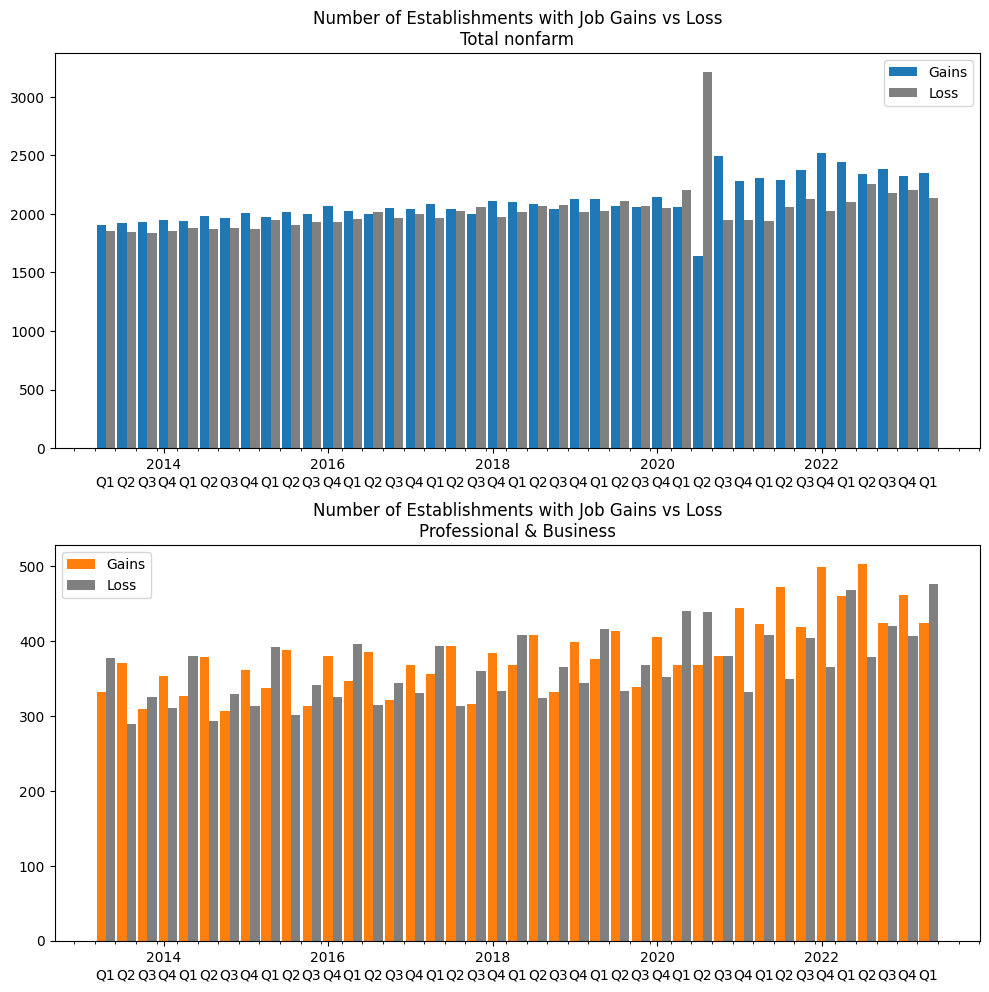

In [42]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Total
total_x = mdates.date2num(total_gains["date"])
width = total_gains.size/2
axs[0].bar(total_x, total_gains["value"], width=width, align="center", label="Gains")
axs[0].bar(total_x + width, total_loss["value"], width=width, 
           align="center", label="Loss", color="grey")
axs[0].xaxis_date()
axs[0].xaxis.set_minor_locator(mdates.MonthLocator([3, 6, 9, 12]))
labels = [""]*2 + "Q1 Q2 Q3 Q4".split() * (total_x.size // 4) + ["Q1"]
axs[0].set_xticklabels(minor=True, labels=labels,
                       fontdict={"ha": "right", "position": (0, -0.05)})
axs[0].legend()
axs[0].set_title("Number of Establishments with Job Gains vs Loss\nTotal nonfarm")

# Professional & Business Services
prof_x = mdates.date2num(prof_gains["date"])
width = prof_gains.size/2
axs[1].bar(prof_x, prof_gains["value"], width=width, align="center", color="tab:orange", label="Gains")
axs[1].bar(prof_x + width, prof_loss["value"], width=width, 
           align="center", label="Loss", color="grey")
axs[1].xaxis_date()
axs[1].xaxis.set_minor_locator(mdates.MonthLocator([3, 6, 9, 12]))
axs[1].set_xticklabels(minor=True, labels=labels,
                       fontdict={"ha": "right", "position": (0, -0.05)})
axs[1].legend()
axs[1].set_title("Number of Establishments with Job Gains vs Loss\nProfessional & Business")

plt.tight_layout()
plt.show()

## Job Hires
Professional & Business services had a large spike mid-2021 to mid-2022 and appears to be declining rapidly.

In [6]:
total_hires = pd.read_csv("processed/hires_total.csv", parse_dates=["date"])
prof_hires = pd.read_csv("processed/hires_prof_bus.csv", parse_dates=["date"])

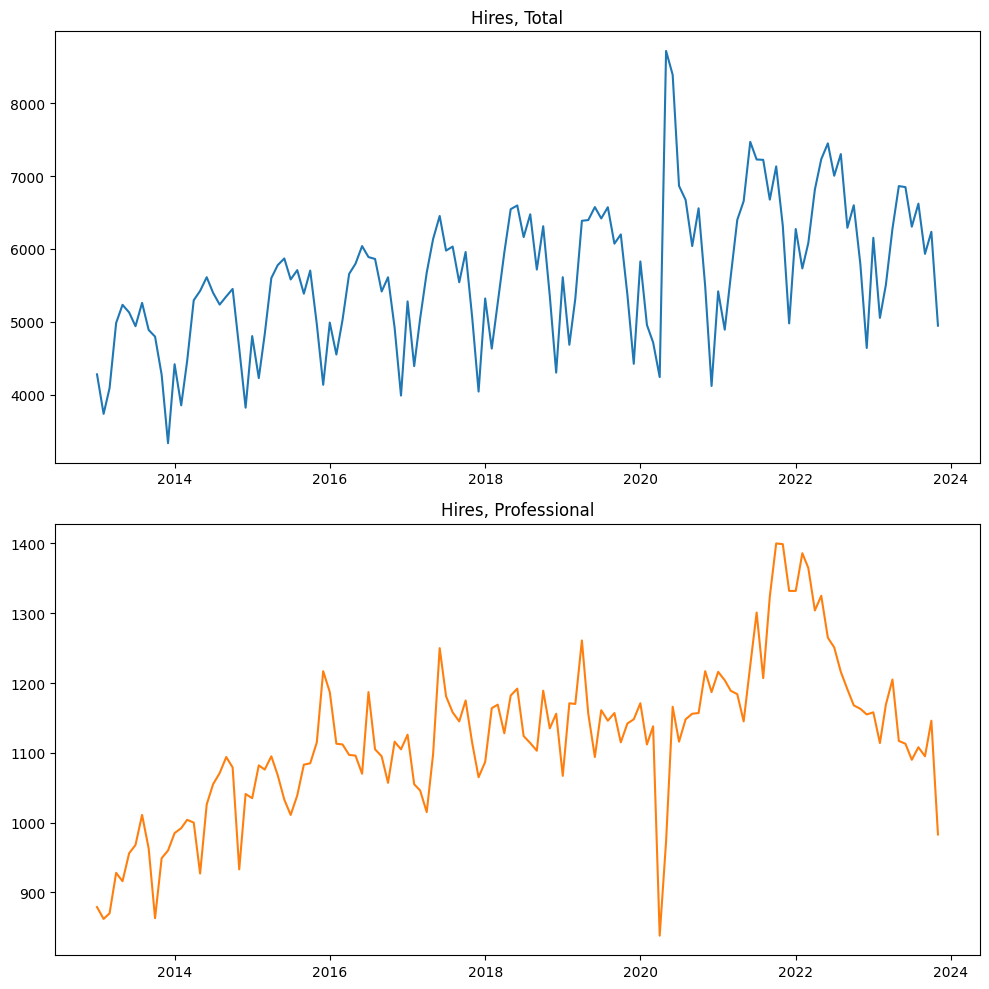

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Total
axs[0].plot(total_hires["date"], total_hires["value"])
axs[0].set_title("Hires, Total")

# Professional
axs[1].plot(prof_hires["date"], prof_hires["value"], color="tab:orange")
axs[1].set_title("Hires, Professional")

plt.tight_layout()
plt.show()


## Layoffs and Disharges

Large spike in layoffs at the beginning of 2023, but layoffs seem to be returning to normalcy since.

In [8]:
total_layoffs = pd.read_csv("processed/layoff_total.csv", parse_dates=["date"])
prof_layoffs = pd.read_csv("processed/layoff_prof.csv", parse_dates=["date"])

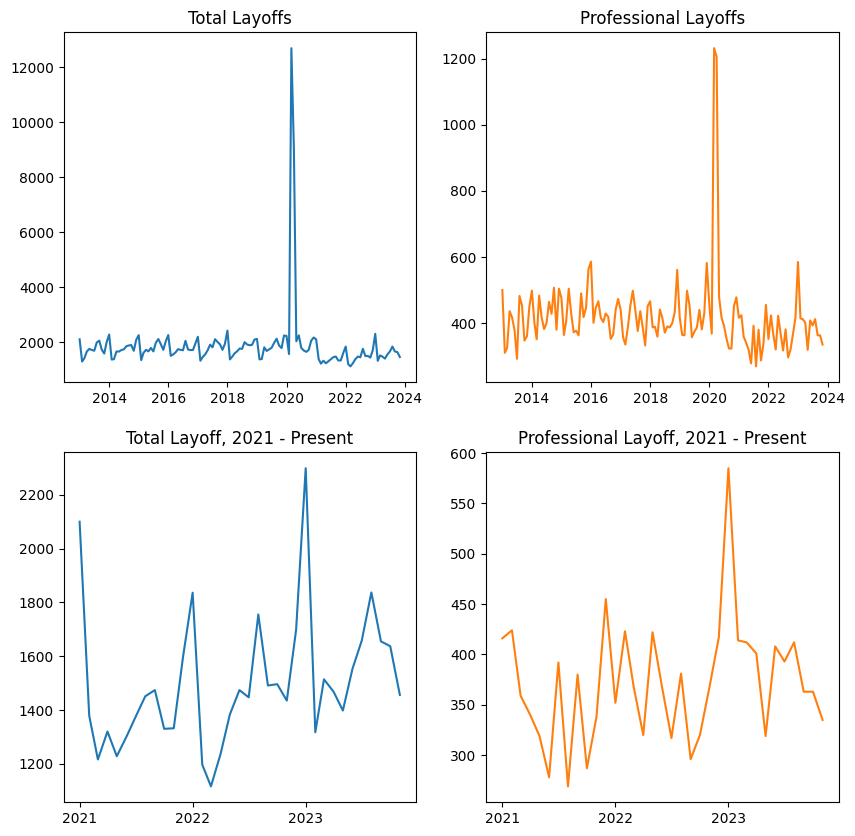

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(total_layoffs["date"], total_layoffs["value"])


axs[0, 0].set_title("Total Layoffs")

axs[0, 1].plot(prof_layoffs["date"], prof_layoffs["value"], color="tab:orange")
axs[0, 1].set_title("Professional Layoffs")

axs[1, 0].plot(
    total_layoffs.loc[total_layoffs["date"] > "2020-12-01", ["date"]],
    total_layoffs.loc[total_layoffs["date"] > "2020-12-01", ["value"]]
)
axs[1, 0].xaxis.set_major_locator(mdates.YearLocator())
axs[1, 0].set_title("Total Layoff, 2021 - Present")

axs[1, 1].plot(
    prof_layoffs.loc[prof_layoffs["date"] > "2020-12-01", ["date"]],
    prof_layoffs.loc[prof_layoffs["date"] > "2020-12-01", ["value"]],
    color="tab:orange"
)
axs[1, 1].set_title("Professional Layoff, 2021 - Present")
axs[1, 1].xaxis.set_major_locator(mdates.YearLocator())

plt.show()

## Ratio Hires to Layoffs

In [10]:
total_hl = pd.DataFrame()
total_hl["date"] = total_hires["date"]
total_hl["ratio"] = total_hires["value"] / total_layoffs["value"]

prof_hl = pd.DataFrame()
prof_hl["date"] = prof_hires["date"]
prof_hl["ratio"] = prof_hires["value"] / prof_layoffs["value"]

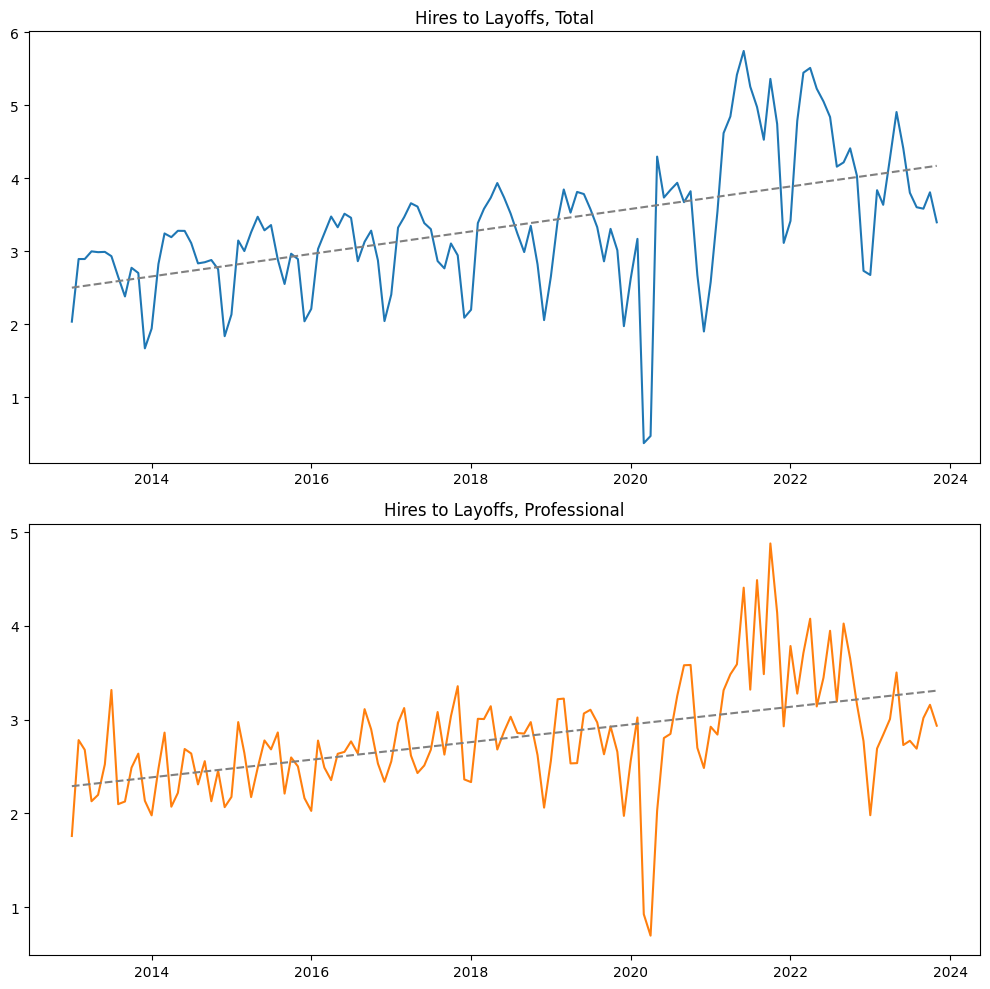

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

total_A = np.vstack([total_hl.index, np.ones(len(total_hl.index))]).T
total_m, total_c = np.linalg.lstsq(total_A, total_hl["ratio"], rcond=None)[0]
prof_A = np.vstack([prof_hl.index, np.ones(len(prof_hl.index))]).T
prof_m, prof_c = np.linalg.lstsq(prof_A, prof_hl["ratio"], rcond=None)[0]

# Total
axs[0].plot(total_hl["date"], total_hl["ratio"])
axs[0].set_title("Hires to Layoffs, Total")
axs[0].plot(total_hl["date"], total_m * total_hl.index + total_c, color="grey", linestyle="--") 

# Professional
axs[1].plot(prof_hl["date"], prof_hl["ratio"], color="tab:orange")
axs[1].set_title("Hires to Layoffs, Professional")
axs[1].plot(prof_hl["date"], prof_m * prof_hl.index + prof_c, color="grey", linestyle="--")

plt.tight_layout()


## Ratio Hires to Openings

In [12]:
total_ratio = pd.DataFrame()
total_ratio["date"] = total["date"]
total_ratio["ratio"] = total_hires["value"] / total["value"]

prof_ratio = pd.DataFrame()
prof_ratio["date"] = prof["date"]
prof_ratio["ratio"] = prof_hires["value"] / prof["value"]

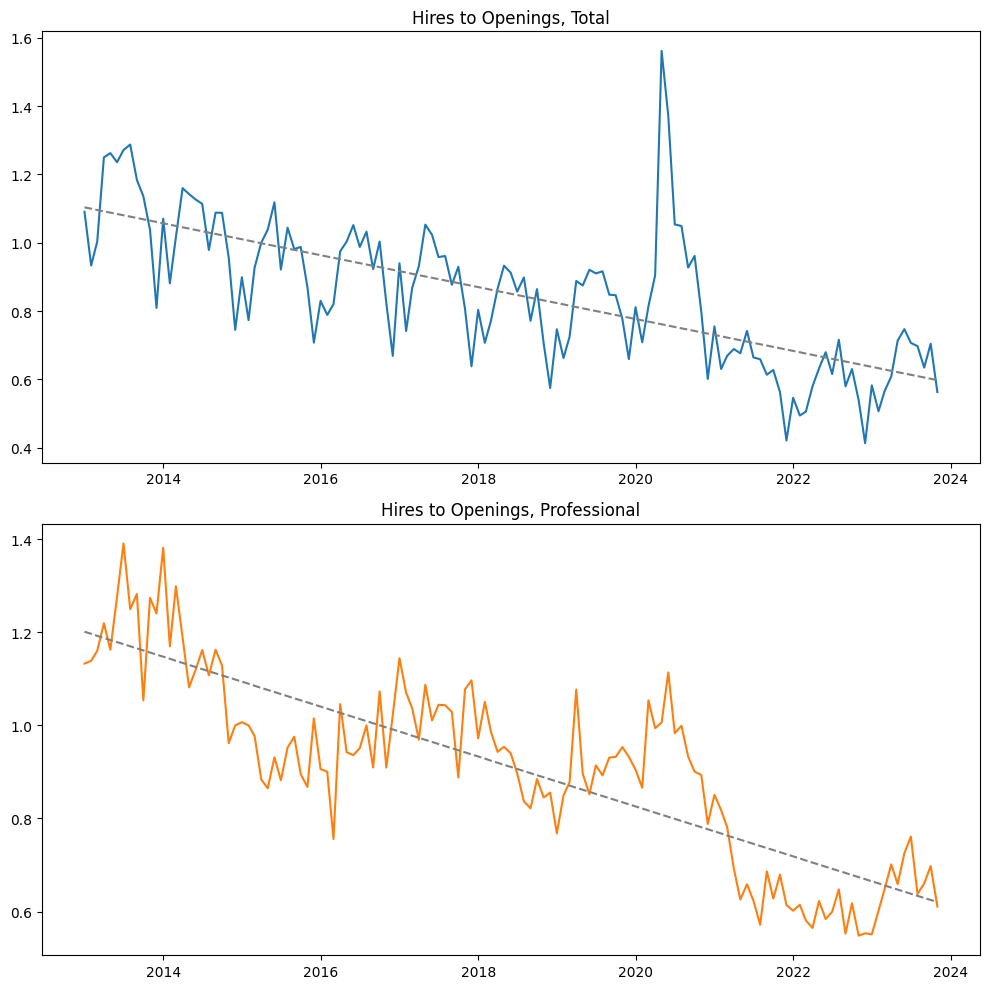

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

total_A = np.vstack([total_ratio.index, np.ones(len(total_ratio.index))]).T
total_m, total_c = np.linalg.lstsq(total_A, total_ratio["ratio"], rcond=None)[0]
prof_A = np.vstack([prof_ratio.index, np.ones(len(prof_ratio.index))]).T
prof_m, prof_c = np.linalg.lstsq(prof_A, prof_ratio["ratio"], rcond=None)[0]

# Total
axs[0].plot(total_ratio["date"], total_ratio["ratio"])
axs[0].set_title("Hires to Openings, Total")
axs[0].plot(total_ratio["date"], total_m * total_ratio.index + total_c, color="grey", linestyle="--") 

# Professional
axs[1].plot(prof_ratio["date"], prof_ratio["ratio"], color="tab:orange")
axs[1].set_title("Hires to Openings, Professional")
axs[1].plot(prof_ratio["date"], prof_m * prof_ratio.index + prof_c, color="grey", linestyle="--")

plt.tight_layout()
plt.show()

## Yearly Averages

In [51]:
desc = pd.DataFrame()
desc["date"] = total["date"]
desc["O_Total"] = total["value"]
desc["O_prof"] = prof["value"]
desc["H_Total"] = total_hires["value"]
desc["H_prof"] = prof_hires["value"]
desc["L_Total"] = total_layoffs["value"]
desc["L_prof"] = prof_layoffs["value"]

In [52]:
year_means = desc.groupby(pd.Grouper(key="date", freq="Y")).mean()
year_std = desc.groupby(pd.Grouper(key="date", freq="Y")).std()

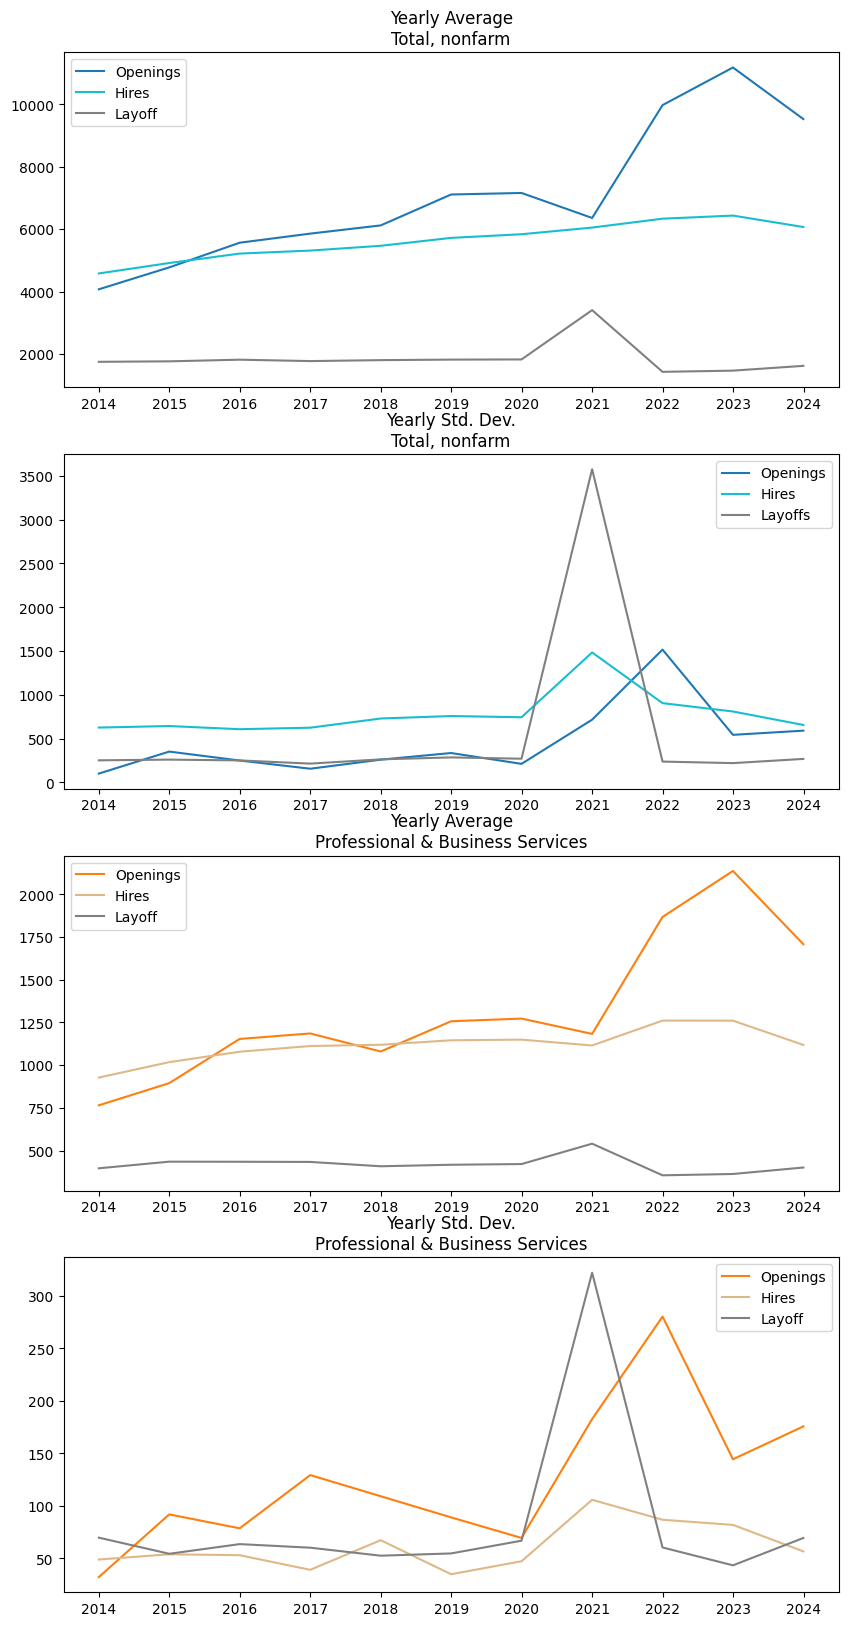

In [92]:
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Year Average Total
axs[0].plot(year_means.index, year_means["O_Total"], label="Openings")
axs[0].plot(year_means.index, year_means["H_Total"], color="tab:cyan", label="Hires")
axs[0].plot(year_means.index, year_means["L_Total"], color="grey", label="Layoff")
axs[0].set_title("Yearly Average\nTotal, nonfarm")
axs[0].legend()

# STD Deviation
axs[1].plot(year_std.index, year_std["O_Total"], label="Openings")
axs[1].plot(year_std.index, year_std["H_Total"], color="tab:cyan", label="Hires")
axs[1].plot(year_std.index, year_std["L_Total"], color="grey", label="Layoffs")
axs[1].set_title("Yearly Std. Dev.\nTotal, nonfarm")
axs[1].legend()

# Professional Average
axs[2].plot(year_means.index, year_means["O_prof"], color="tab:orange", label="Openings")
axs[2].plot(year_means.index, year_means["H_prof"], color="burlywood", label="Hires")
axs[2].plot(year_means.index, year_means["L_prof"], color="grey", label="Layoff")
axs[2].set_title("Yearly Average\nProfessional & Business Services")
axs[2].legend()

# Professional STDDev
axs[3].plot(year_std.index, year_std["O_prof"], color="tab:orange", label="Openings")
axs[3].plot(year_std.index, year_std["H_prof"], color="burlywood", label="Hires")
axs[3].plot(year_std.index, year_std["L_prof"], color="grey", label="Layoff")
axs[3].set_title("Yearly Std. Dev.\nProfessional & Business Services")
axs[3].legend()

plt.show()

## To Presentation Layer

In [88]:
establishments = pd.DataFrame()
establishments["date"] = total_gains["date"]
establishments["G_Total"] = total_gains["value"]
establishments["L_Total"] = total_loss["value"]
establishments["G_prof"] = prof_gains["value"]
establishments["L_prof"] = prof_loss["value"]
establishments = establishments.set_index("date")

In [89]:
desc = desc.set_index("date")

In [90]:
desc.to_csv("presentation/openings_hires_layoffs.csv")
establishments.to_csv("presentation/establishents.csv")